## DL-LA with Tensorflow 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import os
import scipy.io as sio

In [3]:
## Loading MNIST dataset from keras
import keras
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
/home/pace/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pace/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pace/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/pace/.local/lib/python3.6/site-packages/tens

In [4]:
from keras.utils import to_categorical

In [5]:
## Importing required libraries
import numpy as np
import tensorflow.compat.v1 as tf
from sklearn.metrics import roc_auc_score, accuracy_score
s = tf.InteractiveSession()
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [6]:
d_len = 5083400
d_file_len = 5083400
num_files = 50834

In [7]:
def concatDataTraces(path):
    mats = []
    index = 0 
    fileNames = np.arange(100, (d_len + 100), 100).tolist()
    for r in range(0,num_files):
        mats.append(sio.loadmat(path+"traces_"+ str(fileNames[index]) +".mat", verify_compressed_data_integrity=False))
        index = index + 1
    mats = np.array(mats)
    myArray = []
    
    for i in range(0,num_files):
        for j in range(0,10):
            myArray.append(mats[i]['data'][j])
    return(myArray)

In [8]:
def concatDataTrigger(path):
    mats = []
    index = 0 
    fileNames = np.arange(100, (d_len + 100), 100).tolist()
    for r in range(0,num_files):
        mats.append(sio.loadmat(path+"trigger_"+ str(fileNames[index]) +".mat", verify_compressed_data_integrity=False))
        index = index + 1
    mats = np.array(mats)
    myArray = []
    
    for i in range(0,num_files):
        for j in range(0,10):
            myArray.append(mats[i]['data'][j])
    return(myArray)

### Load Data

In [9]:
df_data = concatDataTraces('../real_traces/SBOX_traces2019-12-18_17_31_01/spot_4_12/sliced/')

In [10]:
len(df_data)

508340

In [ ]:
df_trigger = concatDataTrigger('../real_traces/SBOX_traces2019-12-18_17_31_01/spot_4_12/trigger/')

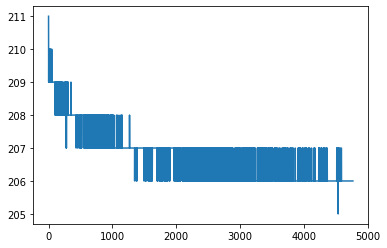

In [11]:
plt.plot(df_trigger[10][80:4850])
plt.show()

In [11]:
slTest = []
for i in df_data:
    slTest.append(i[276:10490])
df_data = slTest

In [12]:
len(df_data[0])

10214

In [13]:
for i in range(0,len(df_data)):
    df_data[i] = df_data[i]

### Create Label

In [14]:
counter = 0
df_new_label = []
for i in range(0,len(df_data)):
    if counter == 0:
        df_new_label.append(0)
        counter = 1
    else:
        df_new_label.append(1)
        counter = 0

In [15]:
df_label = df_new_label

### Split Label

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_data,df_label,test_size=0.2,shuffle=True,stratify=df_label)

In [17]:
#X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,shuffle=True,stratify=y_train)

In [18]:
y_train = to_categorical(y_train,num_classes=2)

In [19]:
y_test = to_categorical(y_test,num_classes=2)

In [20]:
#y_val = to_categorical(y_val,num_classes=2)

In [21]:
import numpy as np

In [22]:
X_train = np.array(X_train)

In [23]:
y_train = np.array(y_train)

In [24]:
#X_val = np.array(X_val)

In [25]:
#y_val = np.array(y_val)

In [26]:
X_test = np.array(X_test)

In [27]:
y_test = np.array(y_test)

In [28]:
## Defining various initialization parameters for 784-512-256-10 MLP model
num_classes = y_train.shape[1]
num_features = X_train.shape[1]
num_output = y_train.shape[1]
num_layers_0 = 120
num_layers_1 = 90
num_layers_2 = 50
num_layers_3 = 2
starter_learning_rate = 0.001
regularizer_rate = 0.1

In [29]:
# Placeholders for the input data
input_X = tf.placeholder('float32',shape =(None,num_features),name="input_X")
input_y = tf.placeholder('float32',shape = (None,num_classes),name='input_Y')
## for dropout layer
keep_prob = tf.placeholder(tf.float32)

In [30]:
## Initializing weigths and biases
hidden_output_0 = tf.layers.dense(input_X, units=num_layers_0)
hidden_output_0 = tf.layers.batch_normalization(hidden_output_0, training=True)
hidden_output_0 = tf.nn.relu(hidden_output_0)

hidden_output_1 = tf.layers.dense(hidden_output_0, units=num_layers_1)
hidden_output_1 = tf.layers.batch_normalization(hidden_output_1, training=True)
hidden_output_1 = tf.nn.relu(hidden_output_1)

hidden_output_2 = tf.layers.dense(hidden_output_1, units=num_layers_2)
hidden_output_2 = tf.layers.batch_normalization(hidden_output_2, training=True)
hidden_output_2 = tf.nn.relu(hidden_output_2)

hidden_output_3 = tf.layers.dense(hidden_output_2, units=num_layers_3)
predicted_y = tf.nn.softmax(hidden_output_3)

#predicted_y = tf.nn.softmax(hidden_output_3)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).


In [31]:
## Defining the loss function
loss = tf.reduce_mean(tf.squared_difference(predicted_y, input_y))

In [32]:
## Variable learning rate
learning_rate = tf.train.exponential_decay(starter_learning_rate, 0, 5, 0.85, staircase=True)

## Adam optimzer for finding the right weight
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [33]:
## Metrics definition
correct_prediction = tf.equal(tf.argmax(y_train,1), tf.argmax(predicted_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [34]:
## Training parameters
batch_size = 1000
epochs=30
dropout_prob = 0.6
training_accuracy = []
training_loss = []
testing_accuracy = []
saver = tf.train.Saver()
s.run(tf.global_variables_initializer())
file_writer = tf.summary.FileWriter('./', tf.get_default_graph())

for epoch in range(epochs):    
    arr = np.arange(X_train.shape[0])
    np.random.shuffle(arr)
    for index in range(0,X_train.shape[0],batch_size):
        s.run(optimizer, {input_X: X_train[arr[index:index+batch_size]],
                          input_y: y_train[arr[index:index+batch_size]]})
    
    saver.save(s, './model.ckpt')
    training_accuracy.append(s.run(accuracy, feed_dict= {input_X: X_train, 
                                                         input_y: y_train}))
    training_loss.append(s.run(loss, {input_X: X_train, 
                                      input_y: y_train}))
    
    
    ## Evaluation of model
    testing_accuracy.append(accuracy_score(y_test.argmax(1), 
                                           s.run(predicted_y, {input_X: X_test}).argmax(1)))
    print("Epoch:{0}, Train loss: {1:.2f} Train acc: {2:.3f}, Test acc:{3:.3f}".format(epoch,
                                                                    training_loss[epoch],
                                                                    training_accuracy[epoch],
                                                                    testing_accuracy[epoch]))

Epoch:0, Train loss: 0.22 Train acc: 0.594, Test acc:0.591
Epoch:1, Train loss: 0.21 Train acc: 0.650, Test acc:0.644
Epoch:2, Train loss: 0.19 Train acc: 0.692, Test acc:0.681
Epoch:3, Train loss: 0.19 Train acc: 0.690, Test acc:0.676
Epoch:4, Train loss: 0.19 Train acc: 0.699, Test acc:0.683
Epoch:5, Train loss: 0.18 Train acc: 0.702, Test acc:0.685
Epoch:6, Train loss: 0.18 Train acc: 0.703, Test acc:0.684
Epoch:7, Train loss: 0.18 Train acc: 0.704, Test acc:0.684
Epoch:8, Train loss: 0.18 Train acc: 0.708, Test acc:0.687
Epoch:9, Train loss: 0.18 Train acc: 0.710, Test acc:0.686
Epoch:10, Train loss: 0.18 Train acc: 0.713, Test acc:0.685
Epoch:11, Train loss: 0.18 Train acc: 0.714, Test acc:0.682
Epoch:12, Train loss: 0.18 Train acc: 0.718, Test acc:0.682
Epoch:13, Train loss: 0.17 Train acc: 0.724, Test acc:0.682
Epoch:14, Train loss: 0.17 Train acc: 0.732, Test acc:0.684
Epoch:15, Train loss: 0.17 Train acc: 0.734, Test acc:0.680
Epoch:16, Train loss: 0.16 Train acc: 0.745, Test 

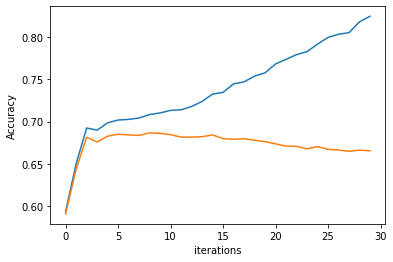

Train Accuracy: 0.82
Test Accuracy:  0.67


In [35]:
## Plotting chart of training and testing accuracy as a function of iterations
iterations = list(range(epochs))
plt.plot(iterations, training_accuracy, label='Train')
plt.plot(iterations, testing_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('iterations')
plt.show()
print("Train Accuracy: {0:.2f}".format(training_accuracy[-1]))
print("Test Accuracy: {0: .2f}".format(testing_accuracy[-1]))

In [38]:
dO_i = tf.gradients(predicted_y, tf.trainable_variables(),unconnected_gradients='zero')

In [39]:
gradients= None
gradients = s.run(dO_i, feed_dict= {input_X: X_train[0:3500]})

In [40]:
len(gradients)

14

In [41]:
#gradients

In [42]:
# Dense 120
gradients[0].shape

(10214, 120)

In [43]:
# Batch Normalizer
gradients[1].shape

(120,)

In [44]:
# Batch Normalizer
gradients[2].shape

(120,)

In [45]:
# ReLU
gradients[3].shape

(120,)

In [46]:
# Dense 90
gradients[4].shape

(120, 90)

In [47]:
# Batch Normalizer
gradients[5].shape

(90,)

In [48]:
# Batch Normalizer
gradients[6].shape

(90,)

In [49]:
# ReLU
gradients[7].shape

(90,)

In [50]:
# Dense 50
gradients[8].shape

(90, 50)

In [51]:
# Batch Normalizer
gradients[9].shape

(50,)

In [52]:
# Batch Normalizer
gradients[10].shape

(50,)

In [53]:
# ReLU
gradients[11].shape

(50,)

In [54]:
# Dense 2
gradients[12].shape

(50, 2)

In [55]:
# Softmax
gradients[13].shape

(2,)

In [56]:
gradients[3]

array([-2.14248743e-07,  7.82273233e-08, -3.00840099e-07,  2.44746388e-07,
        9.69431042e-08,  8.16914451e-07, -1.77614680e-07,  3.91803781e-08,
       -9.43880885e-09, -4.75459842e-07,  4.72869885e-07,  2.16475684e-07,
       -1.44159472e-07,  4.16881463e-08, -3.53640779e-08,  1.05105050e-06,
       -2.36189308e-07, -3.00234603e-07,  2.84332700e-08, -7.52112861e-09,
        2.79186622e-07, -4.94687882e-08, -2.29403611e-07,  1.57053847e-07,
       -1.30485518e-07,  1.05428715e-08,  1.60061063e-07,  3.80230233e-07,
        2.54121119e-07, -3.61099154e-07, -1.08846322e-07, -3.00959954e-07,
       -4.95146139e-07, -3.38032208e-07, -2.76310288e-07, -1.39013451e-07,
       -6.25153746e-07, -4.43784415e-07, -2.20496133e-07, -5.32955710e-07,
       -2.30903353e-07,  4.99227156e-07, -4.94554513e-07,  9.37401126e-08,
        4.46513013e-07, -3.67187852e-07,  2.00734732e-07, -5.58960267e-07,
       -2.57419174e-07,  3.43460478e-08, -4.24043122e-07, -7.72167184e-08,
        4.63228702e-07, -

In [57]:
gradients[0][0][0]

-1.8351045e-09

In [58]:
gradients[0]

array([[-1.83510451e-09, -9.31721544e-09, -6.93867719e-09, ...,
         1.24959887e-09, -9.14855747e-10,  6.19946405e-09],
       [ 1.70713932e-09,  1.03412034e-08,  5.27364108e-09, ...,
        -1.33069999e-08, -3.24570948e-09, -1.92383247e-08],
       [ 1.62669878e-09,  3.72125442e-09, -4.28620694e-10, ...,
         8.85482709e-09, -6.41422204e-09,  1.33050904e-08],
       ...,
       [ 1.09713003e-08, -7.12335435e-09, -1.73791932e-08, ...,
         1.57819784e-08,  1.17455059e-08,  3.27271472e-08],
       [ 1.45063339e-09, -9.80727677e-09, -2.36558009e-08, ...,
         5.68590330e-09,  2.00684553e-08,  2.86369328e-09],
       [-9.66288383e-10, -9.72276126e-09, -6.55126797e-09, ...,
        -6.83329304e-09, -9.16707421e-09, -2.80115842e-09]], dtype=float32)

In [59]:
gradients[0]

array([[-1.83510451e-09, -9.31721544e-09, -6.93867719e-09, ...,
         1.24959887e-09, -9.14855747e-10,  6.19946405e-09],
       [ 1.70713932e-09,  1.03412034e-08,  5.27364108e-09, ...,
        -1.33069999e-08, -3.24570948e-09, -1.92383247e-08],
       [ 1.62669878e-09,  3.72125442e-09, -4.28620694e-10, ...,
         8.85482709e-09, -6.41422204e-09,  1.33050904e-08],
       ...,
       [ 1.09713003e-08, -7.12335435e-09, -1.73791932e-08, ...,
         1.57819784e-08,  1.17455059e-08,  3.27271472e-08],
       [ 1.45063339e-09, -9.80727677e-09, -2.36558009e-08, ...,
         5.68590330e-09,  2.00684553e-08,  2.86369328e-09],
       [-9.66288383e-10, -9.72276126e-09, -6.55126797e-09, ...,
        -6.83329304e-09, -9.16707421e-09, -2.80115842e-09]], dtype=float32)

In [60]:
def calcLayer(inputLayer,outputLayer):
    tmpArr = []
    for i in inputLayer:
        tmpSUM = []
        for j in outputLayer:
            tmpSUM.append(j * i)
        tmpArr.append(sum(tmpSUM))
    return(tmpArr)

In [61]:
L1 = calcLayer(gradients[0],np.array(gradients[3]))
L2 = calcLayer(L1,np.array(gradients[7]))
L3 = calcLayer(L2,np.array(gradients[11]))
L4 = calcLayer(L3,np.array([gradients[13][0]]))

In [62]:
(gradients[13][0] * X_train[0][0]) + (gradients[13][0] * X_train[1][0])

0.0040831324

In [63]:
myTmp = []
tmpArr = []
for j in range(500,5000,150):
    gradients= None
    gradients = s.run(dO_i, feed_dict= {input_X: X_train[0:j]})

    L1 = calcLayer(gradients[0],np.array(gradients[3]))
    L2 = calcLayer(L1,np.array(gradients[7]))
    L3 = calcLayer(L2,np.array(gradients[11]))
    L4 = calcLayer(L3,np.array([gradients[13][0]]))
    tmpArr.append(np.max(L4))    
    
#myTmp.append(np.max(-np.log10(np.abs(L4))))

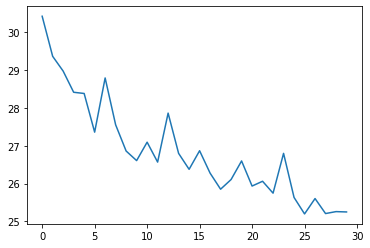

In [64]:
plt.plot(-np.log10(np.abs(tmpArr)))
plt.show()

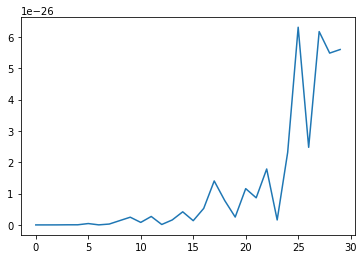

In [67]:
plt.plot(np.abs(tmpArr))
plt.show()

In [65]:
myTmp.append(np.max(-np.log10(np.abs(tmpArr))))

In [ ]:
myTmp = []

In [ ]:
test = []
for i in range(0,len(gradients[0])):
    test.append(np.mean(gradients[0][i,:]))

In [ ]:
test

In [ ]:
np.mean(test)

In [ ]:
 preds = s.run(predicted_y, {input_X: X_test})

In [ ]:
preds

In [ ]:
## Plotting chart of training and testing accuracy as a function of iterations
iterations = list(range(epochs))
plt.plot(iterations, training_accuracy, label='Train')
plt.plot(iterations, testing_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('iterations')
plt.show()
print("Train Accuracy: {0:.2f}".format(training_accuracy[-1]))
print("Test Accuracy:{0:.2f}".format(testing_accuracy[-1]))

In [ ]:
dO = tf.gradients(y_test,X_test,unconnected_gradients='zero')

In [ ]:
dO_i = tf.gradients(predicted_y[0], X_train[1,:],unconnected_gradients='zero')

In [ ]:
dO_i

In [ ]:
with tf.Session() as s:
    init_op = tf.global_variables_initializer()
    s.run(init_op)

    gradients = s.run(dO, feed_dict= {input_X: X_train})

In [ ]:
len(gradients)

In [ ]:
gradients[17].shape

In [ ]:
gradients[15]

In [ ]:
sum(gradients[14]>0)

In [ ]:
test = []
for i in range(0,len(gradients[0])):
    test.append(np.mean(gradients[0][i,:]))

In [ ]:
test

In [ ]:
np.mean(test)

In [ ]:
import keras

# Dummy input
test = np.random.rand(1, 32, 32, 1)

In [ ]:
#x = tf.placeholder(tf.float32, shape=(None, 32, 32, 1))
input_X = tf.placeholder('float32',shape =(None,num_features),name="input_X")

In [ ]:
model = keras.layers.Conv2D(16, 5, padding = 'same', activation='elu') (x)
model = keras.layers.Flatten() (model)
model = keras.layers.Dense(128, activation='relu') (model)
predictions = keras.layers.Dense(1) (model)

In [ ]:
# This was the part that I was missing.

opt = tf.train.GradientDescentOptimizer(learning_rate=0.01)
gradient_step = opt.compute_gradients(predictions, tf.trainable_variables())

In [ ]:
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)

    # This part changed too.

    gradients = sess.run(gradient_step, feed_dict= {input_X: X_train})

In [ ]:
import sys
!{sys.executable} -m pip install --upgrade tensorflow

In [ ]:
import tensorflow as tf


In [ ]:
## Initializing weigths and biases
hidden_output_0 = tf.layers.dense(input_X, units=num_layers_0)
hidden_output_0 = tf.layers.batch_normalization(hidden_output_0, training=True)
hidden_output_0 = tf.nn.relu(hidden_output_0)

hidden_output_1 = tf.layers.dense(hidden_output_0, units=num_layers_1)
hidden_output_1 = tf.layers.batch_normalization(hidden_output_1, training=True)
hidden_output_1 = tf.nn.relu(hidden_output_1)

hidden_output_2 = tf.layers.dense(hidden_output_1, units=num_layers_2)
hidden_output_2 = tf.layers.batch_normalization(hidden_output_2, training=True)
hidden_output_2 = tf.nn.relu(hidden_output_2)

hidden_output_3 = tf.layers.dense(hidden_output_2, units=num_layers_3)
hidden_output_3 = tf.nn.softmax(hidden_output_3)

predicted_y = tf.nn.softmax(hidden_output_3)

In [ ]:
input_X = tf.placeholder('float32',shape =(None,num_features),name="input_X")

In [ ]:
predicted_y

In [ ]:
predictions

In [ ]:
x

In [ ]:
X_train

In [ ]:
x = tf.placeholder('float32',shape =(None,num_features))

In [ ]:
test_dict = {x: X_train}

In [ ]:
test_dict

In [ ]:
test = np.random.rand(1, 32, 32, 1)

In [ ]:
test_dict

In [ ]:
test_dict = {x: test}

In [ ]:
test

In [ ]:
test_dict

In [ ]:
mean_sqr = tf.reduce_mean(tf.squared_difference(predicted_y, input_y))
optimizer = tf.train.AdamOptimizer(LEARNING_RATE)
gradients, variables = zip(*optimizer.compute_gradients(mean_sqr))
opt = optimizer.apply_gradients(list(zip(gradients, variables)))

In [ ]:
import numpy as np
import keras

mean_sqr = tf.reduce_mean(tf.squared_difference(predicted_y, input_y))
optimizer = tf.train.AdamOptimizer(0.001)
gradients, variables = zip(*optimizer.compute_gradients(mean_sqr))
opt = optimizer.apply_gradients(list(zip(gradients, variables)))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for j in range(2):
    sess.run(opt, feed_dict={input_X: X_train,input_y: y_train})

In [ ]:


# Dummy input
#test = np.random.rand(1, 32, 32, 1)

x = tf.placeholder('float32',shape =(None,num_features))

model = keras.layers.Dense(120, activation='relu') (x)
model = keras.layers.Dense(90, activation='relu') (model)
model = keras.layers.Dense(50, activation='relu') (model)
predictions = keras.layers.Dense(2,activation='softmax') (model)

# This was the part that I was missing.

opt = tf.train.GradientDescentOptimizer(learning_rate=0.01)
gradient_step = opt.compute_gradients(predictions, tf.trainable_variables())


with tf.Session() as sess:
    #init_op = tf.global_variables_initializer()
    #sess.run(init_op)
    gradients = sess.run(gradient_step, feed_dict={x: X_train})

In [ ]:
import numpy as np
import keras


# Dummy input
#test = np.random.rand(1, 32, 32, 1)

input_X = tf.placeholder('float32',shape =(None,num_features))

model = keras.layers.Dense(120, activation='relu') (x)
model = keras.layers.Dense(90, activation='relu') (model)
model = keras.layers.Dense(2, activation='relu') (model)
predictions = keras.layers.Dense(2,activation='softmax') (model)

# This was the part that I was missing.

opt = tf.train.GradientDescentOptimizer(learning_rate=0.01)
gradient_step = opt.compute_gradients(predictions, tf.trainable_variables())


with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    gradients = sess.run(predictions, feed_dict={input_X: X_train})

In [ ]:
#funciton to transform gradients
def T(g, decay=1.0):
    #return decayed gradient
    return decay*g

# x variable
x = tf.Variable(10.0,name='x')
# b placeholder (simualtes the "data" part of the training)
b = tf.placeholder(tf.float32)
# make model (1/2)(x-b)^2
xx_b = 0.5*tf.pow(x-b,2)
y=xx_b

learning_rate = 1.0
opt = tf.train.GradientDescentOptimizer(learning_rate)
# gradient variable list = [ (gradient,variable) ]
gv = opt.compute_gradients(y,[x])
# transformed gradient variable list = [ (T(gradient),variable) ]
decay = 0.1 # decay the gradient for the sake of the example
tgv = [(T(g,decay=decay),v) for (g,v) in gv] #list [(grad,var)]
# apply transformed gradients (this case no transform)
apply_transform_op = opt.apply_gradients(tgv)
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    epochs = 10
    for i in range(epochs):
        b_val = 1.0 #fake data (in SGD it would be different on every epoch)
        print('----')
        x_before_update = x.eval()
        print('before update',x_before_update)

        # compute gradients
        grad_vals = sess.run([g for (g,v) in gv], feed_dict={b: b_val})
        print('grad_vals: ',grad_vals)
        # applies the gradients
        result = sess.run(apply_transform_op, feed_dict={b: b_val})

        print( 'value of x should be: ', x_before_update - T(grad_vals[0], decay=decay))
        x_after_update = x.eval()
        print('after update', x_after_update)